import modules

In [1]:
import torch as t
from model import model
import matplotlib.pyplot as plt
import math
import time
from IPython import display
from model import model

c:\Users\jsche\anaconda3\envs\torchenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## define grid and seed cell

50


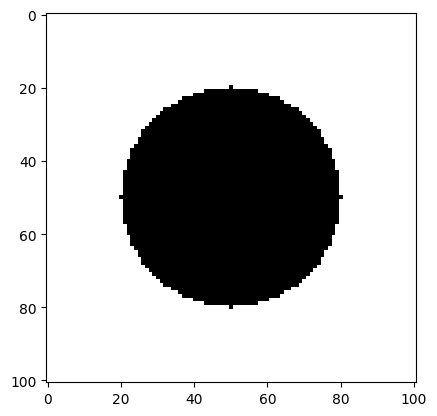

In [2]:
grid = t.zeros((1, 101, 101))

seed_radius = 30.
center = grid.shape[1]//2
print(center)
X = int(seed_radius) # R is the radius
for x in range(-X,X+1):
    Y = int(pow(seed_radius*seed_radius-x*x, 1/2)) # bound for y given x
    for y in range(-Y,Y+1):
        grid[0, center+x,center+y] = 1

plt.imshow(grid[0], cmap="Greys", interpolation="nearest", vmin=0, vmax=1)

## define model params

In [3]:
cell_bg_adhesion = 1
target_volume = 380
vol_scaling = 1
target_perimeter = 219
perim_scaling = 1
temperature = 27

In [4]:
cell_params = {
    "cell_id": 1,
    "adhesion_penalties": {
        0: cell_bg_adhesion
    },
    "target_volume": target_volume,
    "vol_scaling": vol_scaling,
    "target_perimeter": target_perimeter,
    "perim_scaling": perim_scaling
}

## visualize the model

In [21]:
grid = model(grid, [cell_params], temperature=temperature)

In [7]:
print(grid.shape)

torch.Size([101, 101])


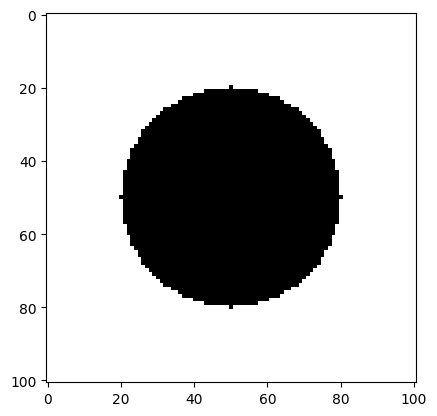

IndexError: too many indices for tensor of dimension 2

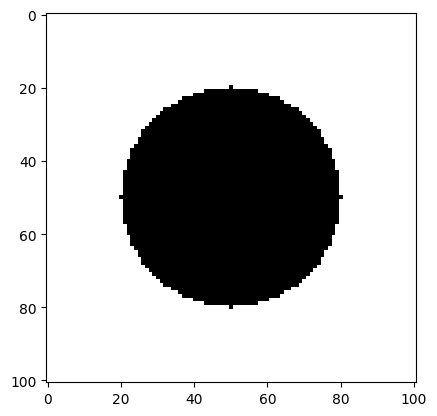

In [5]:
for i in range(100):
  plt.imshow(grid, cmap="Greys", interpolation="nearest", vmin=0, vmax=1)
  display.display(plt.gcf())
  grid = model(grid, [cell_params], temperature=temperature)
  display.clear_output(wait=True)
  time.sleep(0.3)